In [16]:
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

import pandas as pd

In [17]:
df = pd.read_csv("Advertising.csv")
df

,Obs,TV,radio,newspaper,sales,hhg,radioH
0,1,230.1,37.8,69.2,22.1,67,1
1,2,44.5,39.3,45.1,10.4,67,1
2,3,17.2,45.9,69.3,9.3,37,1
3,4,151.5,41.3,58.5,18.5,57,1
4,5,180.8,10.8,58.4,12.9,15,0
...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,16,0
196,197,94.2,4.9,8.1,9.7,36,0
197,198,177.0,9.3,6.4,12.8,29,0
198,199,283.6,42.0,66.2,25.5,29,1


Sample Size: 200
 
Sales Mean: 14.0225
Sales Median: 12.9
Sales Std Dev: 5.217456565710478
 
Newspaper Mean: 30.553999999999995
Newspaper Median: 25.75
Newspaper Std Dev: 21.778620838522826


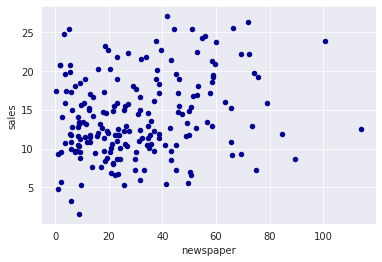

In [24]:
print("Sample Size:", len(df))

print(" ")

print("Sales Mean:", df["sales"].mean())
print("Sales Median:", df["sales"].median())
print("Sales Std Dev:", df["sales"].std())

print(" ")

print("Newspaper Mean:", df["newspaper"].mean())
print("Newspaper Median:", df["newspaper"].median())
print("Newspaper Std Dev:", df["newspaper"].std())

sales_news_plot = df.plot.scatter(x="newspaper", y="sales", c="DarkBlue")
# Doesn't seem like a lot of relationships

In [25]:
df = sm.add_constant(df)
reg1 = sm.OLS(endog = df["sales"], exog=df[["const", "newspaper"]], missing="drop")
type(reg1)

results = reg1.fit()
type(results)

print(results.summary())

# R2 :(0.052) Very low

# pvalue : (0.001) low. So  newspaper variable is significant

# coef: (0.0547) # The newspaper's coefficient is positive. 
# In other words, when you advertise in the newspaper, sales are positively affected

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 25 Jan 2021   Prob (F-statistic):            0.00115
Time:                        22:53:29   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.0

Radio Mean:  23.264000000000006
Radio Median:  22.9
Radio Std Dev:  14.846809176168724


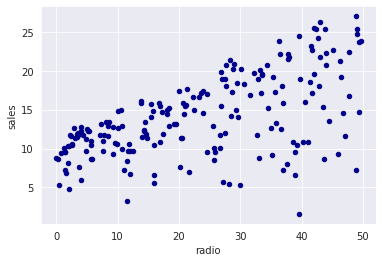

In [26]:
print("Radio Mean: ", df["radio"].mean())
print("Radio Median: ", df["radio"].median())
print("Radio Std Dev: ", df["radio"].std())

sales_radio_plot = df.plot.scatter(x="radio", y="sales", c="DarkBlue")

# Radio ad has a more serious effect on sales than newspaper.

In [27]:
reg1 = sm.OLS(endog=df["sales"], exog=df[["const", "radio"]], missing="drop")

results = reg1.fit()
print(results.summary())

# R2: (0.332) Better than newspaper. So it is significant but not enough!
# pvalue: (0.000) Sıgnıfıcant!
# coef: (0.2025) Radio ad has a positive influence on sales!

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           4.35e-19
Time:                        22:53:40   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.0

TV Mean: 147.0425
TV Median: 149.75
TV Std Dev: 85.85423631490808


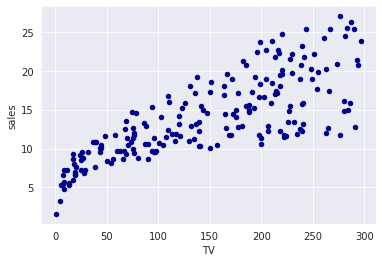

In [29]:
print("TV Mean:", df["TV"].mean())
print("TV Median:", df["TV"].median())
print("TV Std Dev:", df["TV"].std())

sales_Tv_plot = df.plot.scatter(x="TV", y="sales", c="DarkBlue") 

# I can create a better model with a nonlinear model. But right now I will create linearly and make comparisons

In [32]:
reg1 = sm.OLS(endog=df["sales"], exog=df[["const", "TV"]], missing="drop")

results = reg1.fit()
print(results.summary())

# R2: (0.612) Not good enough! But better than others!
# pvalue: (0.00) Sıgnıfıcant!
# coef: (0.0475) Tv ads has positive influence on sales! 

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           1.47e-42
Time:                        23:00:16   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [ ]:
# There is a strange result. Rado(coef) = 0.2025 TV(coef) = 0.04
# Is the radio more important? NO:)

# 1) May have different metrics 2) It may be related to the investments made 
# I can't look at this model and say anything for sure!!
    

In [34]:
reg1 = sm.OLS(endog=df["sales"], exog=df[["const", "TV", "radio", "newspaper"]], missing="drop")

results = reg1.fit()
print(results.summary())

# R2: (0.897) I approached the value I wanted.
# pvalue: TV = 0, Radio = 0, newspaper = 0.860
# coef (newspaper) = -0.0010 

# Why did the newspaper significant, but now not so?
# If you don't put other variables in the model, it just explains by the newspaper.

# What is our model doing?
# Actually, the effect of the newspaper is not negative. My Data made such a correction to fit the average better

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           1.58e-96
Time:                        23:10:47   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

HHG Mean: 48.62
HHG Medin: 48.0
HHG Std Dev: 27.59844143877053


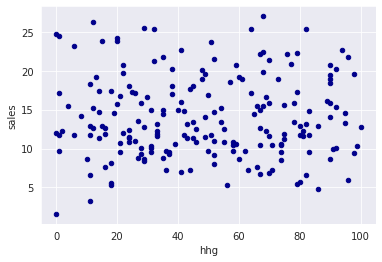

In [35]:
# Now let's look at the hhg data that has no correlation with sales
print("HHG Mean:", df["hhg"].mean())
print("HHG Medin:", df["hhg"].median())
print("HHG Std Dev:", df["hhg"].std())

sales_hhg_plot = df.plot.scatter(x="hhg", y="sales", c="DarkBlue")

In [36]:
reg1 = sm.OLS(endog=df["sales"], exog=df[["const", "hhg"]], missing="drop")

results = reg1.fit()
print(results.summary())

# R2: 0 
# pvalue: 0.862
# coef: 0.0023 # Actually it should come to 0. Trying to fit the available data somehow

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.03023
Date:                Mon, 25 Jan 2021   Prob (F-statistic):              0.862
Time:                        23:21:01   Log-Likelihood:                -613.67
No. Observations:                 200   AIC:                             1231.
Df Residuals:                     198   BIC:                             1238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9089      0.751     18.530      0.0

In [37]:
# Let's add hhg to the big model
# How will my irrelevant variable behave in this model?

reg1 = sm.OLS(endog=df["sales"], exog=df[["const","newspaper", "radio", "TV", "hhg"]], missing="drop")

results = reg1.fit()
print(results.summary())

# R2 = 0.898   R2(original) = 0.897 ??????
# NOTE: That's the problem with R2!
# If you add variables regardless of whether they are relevant or irrelevant to the model, r2 will improve.
# We use Adjusted R2 instead of R2

# AdjR2: 0.895    adjR2(original): 0.896

# hhg pvalue = 0.45 # As high as I expected.. So this is not Signifcant.

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     426.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           3.07e-95
Time:                        23:37:37   Log-Likelihood:                -385.89
No. Observations:                 200   AIC:                             781.8
Df Residuals:                     195   BIC:                             798.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7748      0.380      7.299      0.0

In [39]:
# Model I should use considering these comments;
reg1 = sm.OLS(endog=df["sales"], exog=df[["const", "TV","radio"]])

results = reg1.fit()
print(results.summary())

# Fstatistic: 859.6   -----> The model itself significant!

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           4.83e-98
Time:                        23:47:07   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

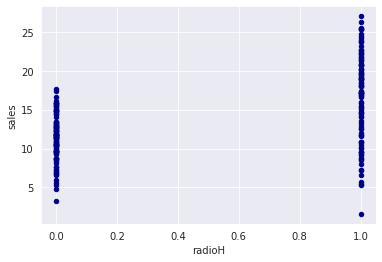

In [48]:
# radio > 23 --> radioH = 1 (else = 0)
# Let's compare continuous and discrete data for this model.

sales_radioh_plot = df.plot.scatter(x="radioH", y="sales", c="DarkBlue")

In [50]:
reg1 = sm.OLS(endog=df["sales"], exog=df[["const", "radioH"]])

results = reg1.fit()
print(results.summary())

# Discrete data for this model negatively impacted my learning!

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     64.68
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           7.90e-14
Time:                        23:57:39   Log-Likelihood:                -585.42
No. Observations:                 200   AIC:                             1175.
Df Residuals:                     198   BIC:                             1181.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4400      0.454     25.191      0.0